<a href="https://colab.research.google.com/github/Milad277/Salary-Estimation-US/blob/main/Salary%20Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Salary Estimation**

The goal is to predict the salary of data related positions based on location, company review and job title


In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving df.csv to df.csv


**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

In [ ]:
df_raw= pd.read_csv('df.csv')

**Data Exploration: Assess Data**

High level summary of data:

column names
data types (detected by Python)
number of NULL values for each column

In [ ]:
df_raw.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),3.5,Hopper\n3.5,"New York, NY",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),4.5,Noom US\n4.5,"New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable
2,Data Science Manager,$111K-$181K (Glassdoor est.),-1.0,Decode_M,"New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable
3,Data Analyst,$111K-$181K (Glassdoor est.),3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable
4,"Director, Data Science",$111K-$181K (Glassdoor est.),3.4,United Entertainment Group\n3.4,"New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          5892 non-null   object 
 1   Salary Estimate    5892 non-null   object 
 2   Rating             5892 non-null   float64
 3   Company Name       5892 non-null   object 
 4   Location           5892 non-null   object 
 5   Size               5892 non-null   object 
 6   Founded            5892 non-null   object 
 7   Type of ownership  5892 non-null   object 
 8   Industry           5892 non-null   object 
 9   Sector             5892 non-null   object 
 10  Revenue            5892 non-null   object 
dtypes: float64(1), object(10)
memory usage: 506.5+ KB


**DATA Cleaning**

In [ ]:
# Remove instances without salary estimates
df = df_raw[df_raw['Salary Estimate'] != '-1']

In [ ]:
# Remove per hour salary
df = df[~df['Salary Estimate'].str.contains('Per Hour')]

In [ ]:
# Remove $
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('$',' '))

In [ ]:
# Remove k
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.replace('K', ' '))

In [ ]:
# Split it
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: x.split())

In [ ]:
df['Min_salary'] = df['Salary Estimate'].apply(lambda x: x[0])
df['Max_salary'] = df['Salary Estimate'].apply(lambda x: x[2])

In [ ]:
# Cast Min_salary and Max_salary to int get the avarage salary
df['Min_salary'] = df['Min_salary'].apply(lambda x:int(x))
df['Max_salary'] = df['Max_salary'].astype(int)
df['Average_salary'] = (df.Min_salary + df.Max_salary)/2

In [ ]:
df['State'] = df['Location'].apply(lambda x: x.split()[-1])
df = df[df.State != 'Kingdom'] # remove United Kingdom

In [ ]:
def title_organizer(x):   #This function organizes the job title
  x = x.lower()
  if ('data scientist' in x) or ('data science' in x) :
    return 'data scientist'
  elif 'data engineer' in x:
    return 'data engineer'
  elif 'data learning' in x:
    return 'deep learning engineer'
  elif 'machine learning' in x:
    return 'machine learning engineer'
  elif 'director' in x:
    return 'director'
  elif 'manager' in x:
    return 'manager'
  elif 'analyst' in x:
    return 'analyst'
  elif 'reseacher' in x:
    return 'researcher'
  else:
    return 'other'

In [ ]:
df['Job Title'] = df['Job Title'].apply(title_organizer) # clean job titile and categorize them into groups

<ipython-input-17-9cd884ef4483>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Job Title'] = df['Job Title'].apply(title_organizer)


In [ ]:
df = df[df['Rating']!=-1]

In [ ]:
cleaned_df = df[['Job Title','Rating', 'Average_salary', 'State']]

In [ ]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4891 entries, 0 to 5887
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Job Title       4891 non-null   object 
 1   Rating          4891 non-null   float64
 2   Average_salary  4891 non-null   float64
 3   State           4891 non-null   object 
dtypes: float64(2), object(2)
memory usage: 191.1+ KB


**Data Visualization/ Exploratory Data Analysis(EDA)**


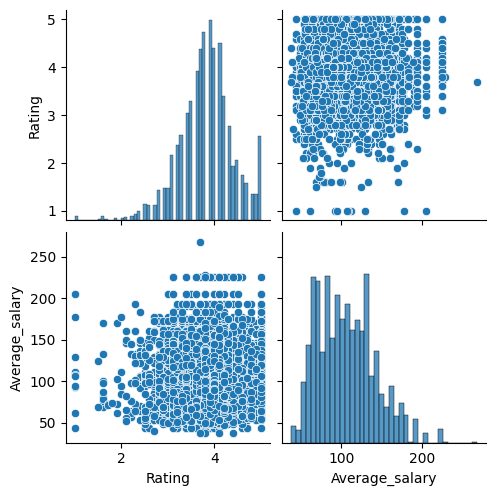

In [ ]:
sns.pairplot(cleaned_df)

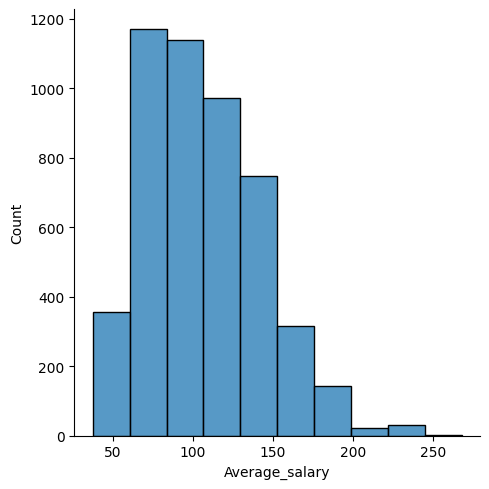

In [ ]:
sns.displot(x= 'Average_salary', data = cleaned_df, bins = 10)
# histogram for avergae salary

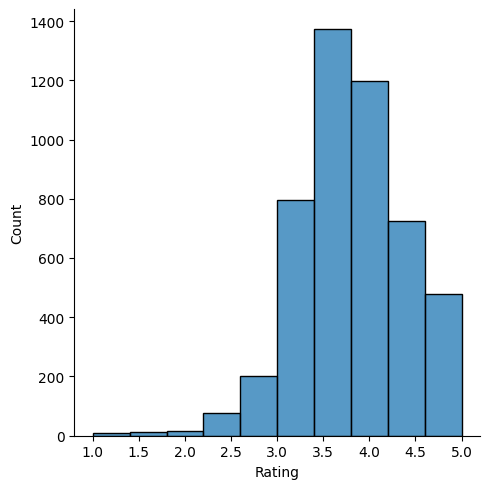

In [ ]:
sns.displot(x = 'Rating', data= cleaned_df, bins= 10)

# bar graph to show numbers by job title

<Axes: xlabel='Rating', ylabel='Average_salary'>

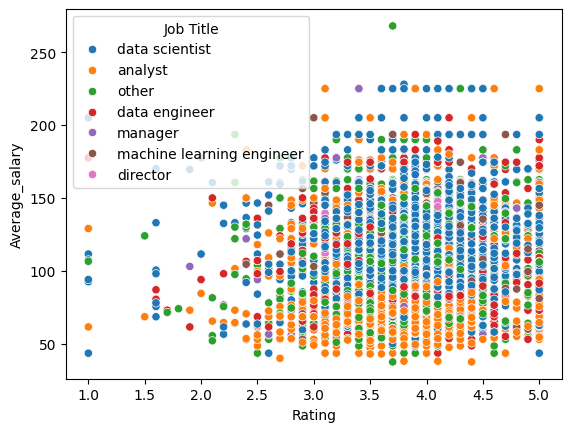

In [ ]:
sns.scatterplot(x='Rating', y= 'Average_salary', data= cleaned_df, hue= 'Job Title')
# scatter plot to show relation between average salary and rating, job title is used for legend colors

**Feature Engineering**

In [ ]:
preprocessed_df = pd.get_dummies(cleaned_df, columns=['Job Title','State'])

In [ ]:
preprocessed_df

,Rating,Average_salary,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,State_AZ,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
0,3.5,146.0,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,4.5,146.0,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3.4,146.0,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,3.4,146.0,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,2.9,146.0,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5881,3.2,51.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
5882,4.2,68.0,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
5883,4.0,89.5,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
5886,4.0,89.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
preprocessed_df['Average_salary'].median()

102.0

In [ ]:
def sat(x):
  if x>= 102:
    return(1)
  else:
    return(0)

In [ ]:
preprocessed_df['Satisfaction'] = preprocessed_df['Average_salary'].apply(sat)

In [ ]:
preprocessed_df[['Average_salary', 'Satisfaction']]

,Average_salary,Satisfaction
0,146.0,1
1,146.0,1
3,146.0,1
4,146.0,1
5,146.0,1
...,...,...
5881,51.0,0
5882,68.0,0
5883,89.5,0
5886,89.0,0


In [ ]:
x = preprocessed_df.drop(columns= ['Average_salary', 'Satisfaction']) # create a data frame for depondednt features

In [ ]:
y = preprocessed_df['Satisfaction']# create a data frame for the target

**Modeling**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.3, random_state= 101)
# split dataset into train and test: 70-30

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Evaluate the model**


In [ ]:
# Prediction
prediction = logreg.predict(x_test)

In [ ]:
prediction

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
y_test

4607    0
3136    1
2694    0
4633    0
4490    1
       ..
5366    0
2080    0
3348    0
1996    0
4704    1
Name: Satisfaction, Length: 1468, dtype: int64

In [ ]:
confusion_matrix(y_test, prediction)

array([[522, 200],
       [232, 514]])

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71       722
           1       0.72      0.69      0.70       746

    accuracy                           0.71      1468
   macro avg       0.71      0.71      0.71      1468
weighted avg       0.71      0.71      0.71      1468



In [ ]:
accuracy_score(y_test, prediction)

0.7057220708446866

In [ ]:
knn = KNeighborsClassifier() #Test by KNN model

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
prediction_knn = knn.predict(x_test)

In [ ]:
prediction_knn

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
y_test

4607    0
3136    1
2694    0
4633    0
4490    1
       ..
5366    0
2080    0
3348    0
1996    0
4704    1
Name: Satisfaction, Length: 1468, dtype: int64

In [ ]:
confusion_matrix(y_test, prediction_knn)

array([[456, 266],
       [249, 497]])

In [ ]:
accuracy_score(y_test, prediction_knn)

0.6491825613079019

In [ ]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       722
           1       0.65      0.67      0.66       746

    accuracy                           0.65      1468
   macro avg       0.65      0.65      0.65      1468
weighted avg       0.65      0.65      0.65      1468



In [ ]:
tree = DecisionTreeClassifier() #Test by Decision Tree Model

In [ ]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
prediction_tree = tree.predict(x_test)

In [ ]:
prediction_tree


array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
confusion_matrix(y_test, prediction_tree)

array([[502, 220],
       [282, 464]])

In [ ]:
accuracy_score(y_test, prediction_tree)

0.6580381471389646

In [ ]:
print(classification_report(y_test, prediction_tree))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       722
           1       0.68      0.62      0.65       746

    accuracy                           0.66      1468
   macro avg       0.66      0.66      0.66      1468
weighted avg       0.66      0.66      0.66      1468

